In [25]:
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import sem
import pandas as pd
# import PCA
from sklearn.decomposition import PCA

In column 1, convert 'MEL' to 1 and 'SEK' to 0. 
In column 6, convert TRUE to 1, FALSE to 0.
In column 8, convert TRUE to 1, FALSE to 0.

In [4]:
# Define the columns to convert
cols_to_convert_mel_sek = [1]
cols_to_convert_bool = [6, 8]

# Load the data from features_output.csv
with open('features_output.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# Convert 'MEL' to 1 and 'SEK' to 0 in column 1
data = [[row[0], int(row[1] == 'MEL'), *row[2:6], int(row[6] == 'TRUE'), *row[7:8], int(row[8] == 'TRUE'), *row[9:]] for row in data]
    
# Save the updated data to a new file called features_numeral.csv
with open('features_numeral.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)


All columns, except column 0 (img_id), into numpy array. 

In [5]:
with open('features_numeral.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header row
    data = []
    for row in reader:
        data.append([float(val) if val != '' else np.nan for val in row[1:]])

X = np.array(data)
print(X.shape)
# print first 5 rows of X
print(X[:5,:])

(96, 8)
[[1.00000000e+00 2.69759598e-03 1.43526234e-03 1.00000000e+00
  1.00000000e+01 1.00000000e+00 7.80000000e+01 0.00000000e+00]
 [1.00000000e+00 9.42314069e-03 5.69996012e-03 5.00000000e+00
  2.15000000e+01 0.00000000e+00 4.90000000e+01 0.00000000e+00]
 [1.00000000e+00 3.27858343e-02 3.80877008e-03 3.00000000e+00
  8.50000000e+00 0.00000000e+00 4.60000000e+01 1.00000000e+00]
 [1.00000000e+00 2.07655131e-02 2.38105263e-03 1.00000000e+00
  8.50000000e+00 0.00000000e+00 4.60000000e+01 1.00000000e+00]
 [1.00000000e+00 5.18957053e-02 5.15493015e-03 6.00000000e+00
  1.25000000e+01 0.00000000e+00 5.80000000e+01 0.00000000e+00]]


Output normalized data into features_normalized.csv

In [10]:
# Define the indices of the columns to normalize
cols_to_normalize = [1, 2, 3, 4, 6]

# Extract the columns to normalize
X_to_normalize = X[:, cols_to_normalize]

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_normalized = scaler.fit_transform(X_to_normalize)

# Replace the normalized columns in X with the scaled values
X[:, cols_to_normalize] = X_normalized

# Output the normalized data to a new file called features_normalized.csv
with open('features_normalized.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    header = ['diagnosis', 'asymmetry', 'border_irregularity', 'color_asymmetry', 'diameter_avg', 'smoke', 'age', 'itch']
    writer.writerow(header)
    writer.writerows(X)

Visualize the difference between MEL and SEK in terms of 6 features. 

   diagnosis  asymmetry  border_irregularity  color_asymmetry  diameter_avg  \
0        1.0  -0.974806            -1.015085        -1.417658     -0.098409   
1        1.0  -0.740246             0.317231         0.453066      1.743006   
2        1.0   0.074552            -0.273587        -0.482296     -0.338593   
3        1.0  -0.344669            -0.719615        -1.417658     -0.338593   
4        1.0   0.741029             0.146961         0.920747      0.301899   

   smoke       age  itch  
0    1.0  0.977910   0.0  
1    0.0 -1.101923   0.0  
2    0.0 -1.317078   1.0  
3    0.0 -1.317078   1.0  
4    0.0 -0.456458   0.0  


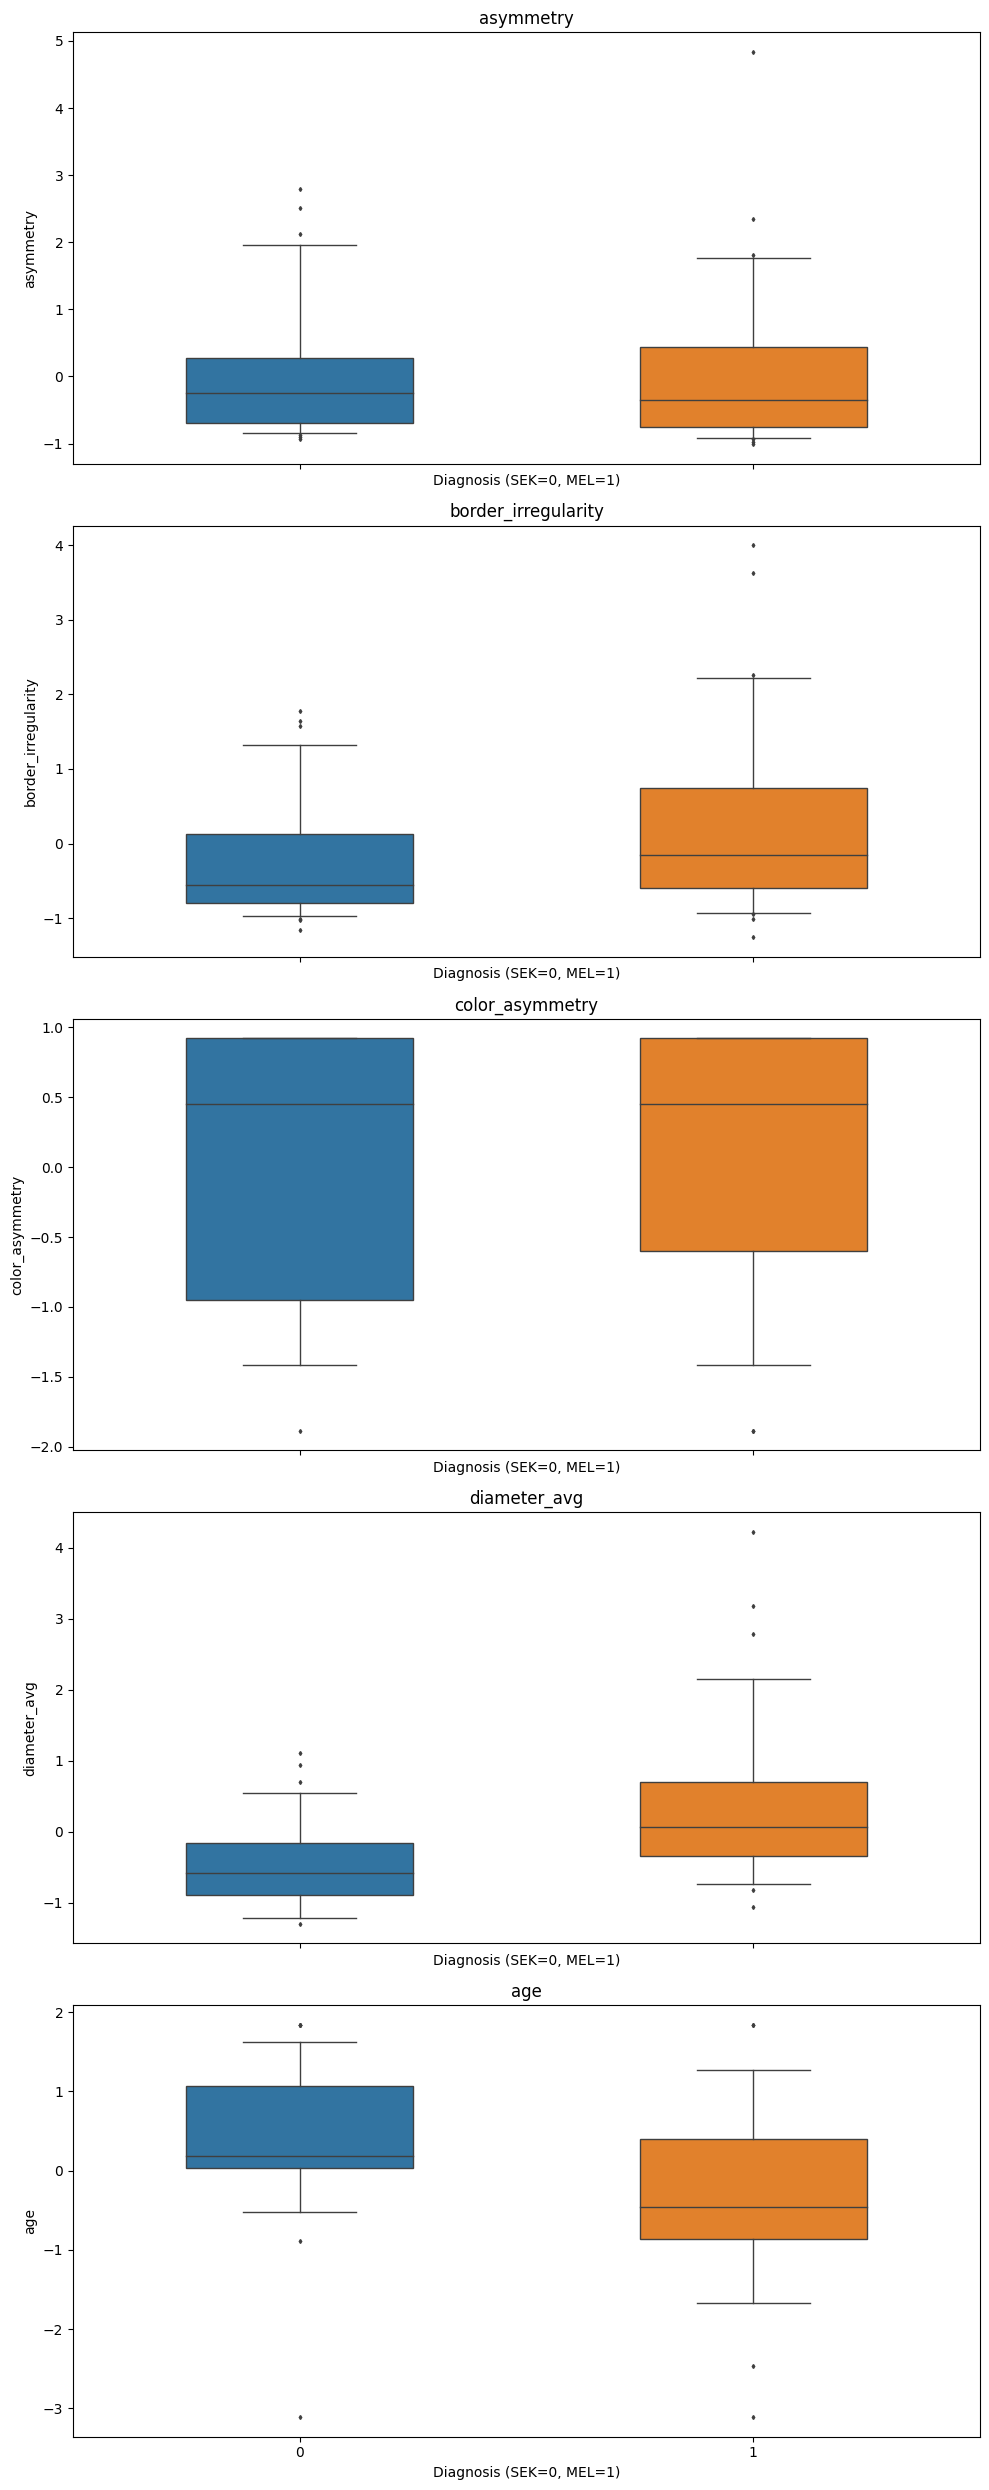

In [23]:
# Load the data into a pandas DataFrame
data = pd.read_csv('features_normalized.csv')
print(data.head())

# Define the columns to plot
cols_to_plot = ['asymmetry', 'border_irregularity', 'color_asymmetry', 'diameter_avg', 'age']

# Create a new figure and axis for each plot
fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(10, 5 * len(cols_to_plot)), sharex=True)

# Loop through each column and plot a boxplot
for i, col in enumerate(cols_to_plot):
    # Create the boxplot
    sns.boxplot(x='diagnosis', y=str(col), data=data, ax=axes[i], whis=[5, 95], width=0.5, linewidth=1, fliersize=2)

    # Set the axis labels and title
    axes[i].set_xlabel('Diagnosis (SEK=0, MEL=1)')
    axes[i].set_ylabel(f'{col}')
    axes[i].set_title(f'{col}')

# Set the x-axis tick labels
axes[-1].set_xticklabels(['0', '1'])

# Show the plots
plt.tight_layout()
plt.show()

PCA analysis

Variance ratio of each component: [0.45719393 0.22086694 0.1507677  0.08123702 0.04554608 0.03114029]


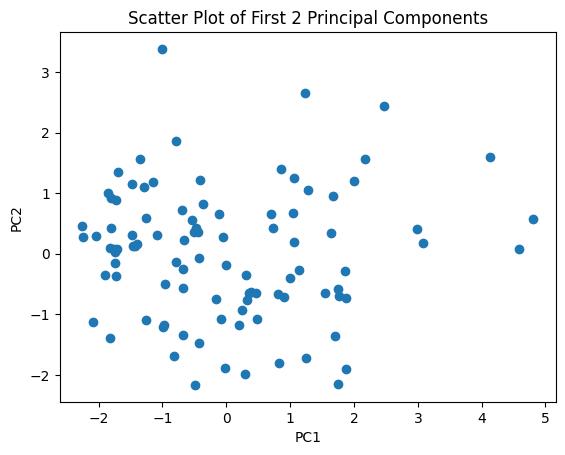

In [28]:
# Extract the features
X = data.iloc[:, 1:].values

# Apply PCA with 6 main components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Analyze the variance ratio of each component
print('Variance ratio of each component:', pca.explained_variance_ratio_)

# Plot in a scatterplot the data points based on the first 2 components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First 2 Principal Components')
plt.show()
